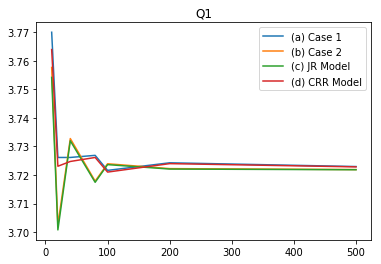

In [7]:
#
# Jung_Hyeuk_Project4.py
# MGMTMFE405-2 Computational Methods in Finance - Project 4
# Hyeuk Jung (005250560)
#

import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import csv
import sys

np.random.seed(int(time.time()))

##### 1. Binomial Tree
S0 = 32; K = 30; sd = 0.24; rf = 0.05; T = 0.5
N = [10, 20, 40, 80, 100, 200, 500]
def binom_case1(S0, K, sd, r, T, n): #, dt, u, d, p
    # parameters
    dt = T / n
    c = 1/2*( exp((-1)*r*dt) + exp((r + sd*sd)*dt))
    d = c - sqrt(c*c - 1)
    u = 1/d
    p = (exp(r*dt) - d)/(u-d)
    discount = exp((-1)*r*dt)

    # stock paths
    stocks = np.zeros((n+1,n+1))
    stocks[0,0] = S0
    for i in range(1, n+1, 1): # column
        stocks[0, i] = stocks[0, 0]*(u**i)
        for j in range(1, i+1, 1): # row
            stocks[j, i] = stocks[j-1,i-1]*d #(d**j)

    call = np.zeros((n+1,n+1)) # call paths
    # final nodes
    for i in range(n, -1, -1): # row
        call[i, n] = max(stocks[i, n] - K, 0)
    for j in range(n-1, -1, -1): # column
        for i in range(j, -1, -1): # row # i-1 --> -1
            call[i, j] = discount*( p*call[i, j+1] + (1-p)*call[i+1, j+1] )
    
    return call[0, 0]

q1_case1 = list()
for i in N:
    q1_case1.append(binom_case1(S0, K, sd, rf, T, i))

# (b)
def binom_case2(type, S0, K, sd, r, T, n): #, dt, u, d, p
    dt = T/n
    u = exp(r*dt)*( 1 + sqrt(exp(sd*sd*dt) - 1) )
    d = exp(r*dt)*( 1 - sqrt(exp(sd*sd*dt) - 1) )
    p = 1/2
    discount = exp((-1)*r*dt)
    # stock paths
    stocks = np.zeros((n+1,n+1))
    stocks[0,0] = S0
    for i in range(1, n+1, 1): # column
        stocks[0, i] = stocks[0, 0]*(u**i)
        for j in range(1, i+1, 1): # row
            stocks[j, i] = stocks[j-1,i-1]*d #(d**j)

    option = np.zeros((n+1,n+1))
    if(type == "C"): # call paths
        # final nodes
        for i in range(n, -1, -1): # row
            option[i, n] = max(stocks[i, n] - K, 0)

        for j in range(n-1, -1, -1): # row
            for i in range(j, -1, -1): # column
                option[i, j] = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])
    
    elif(type == "P"):
        #final nodes
        for i in range(n, -1, -1):
            option[i, n] = max(K - stocks[i, n], 0)

        for j in range(n-1, -1, -1):
            for i in range(j, -1, -1):
                option[i, j] = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])

    return option[0, 0]

q1_case2 = list()
#print('Q1. (b)')
for i in N:
    q1_case2.append(binom_case2("C", S0, K, sd, rf, T, i))

# (c) JR(Jarrow-Rudd) Model
def binom_case3(type, S0, K, sd, r, T, n): #, dt, u, d, p
    dt = T/n
    u = exp( (rf - sd*sd/2)*dt + sd*sqrt(dt) )
    d = exp( (rf - sd*sd/2)*dt - sd*sqrt(dt) )
    p = 1/2
    discount = exp((-1)*r*dt)
    # stock paths
    stocks = np.zeros((n+1,n+1))
    stocks[0,0] = S0
    for i in range(1, n+1, 1): # column
        stocks[0, i] = stocks[0, 0]*(u**i)
        for j in range(1, i+1, 1): # row
            stocks[j, i] = stocks[j-1,i-1]*d #(d**j)

    option = np.zeros((n+1,n+1))
    if(type == "C"): # call paths
        # final nodes
        for i in range(n, -1, -1): # row
            option[i, n] = max(stocks[i, n] - K, 0)

        for j in range(n-1, -1, -1): # row
            for i in range(j, -1, -1): # column
                option[i, j] = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])
    
    elif(type == "P"):
        #final nodes
        for i in range(n, -1, -1):
            option[i, n] = max(K - stocks[i, n], 0)

        for j in range(n-1, -1, -1):
            for i in range(j, -1, -1):
                option[i, j] = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])

    #print('call (n =', n, '):', option[0,0])
    return option[0, 0]

q1_c_jr = list()
for i in N:
    q1_c_jr.append(binom_case3("C", S0, K, sd, rf, T, i))

# (d) CRR(Cox-Ross-Rubinstein) Model
def binom_case4(type, S0, K, sd, r, T, n): #, dt, u, d, p
    dt = T/n
    u = exp(sd*sqrt(dt))
    d = exp(-1*sd*sqrt(dt))
    p = 0.5 + 0.5*((r - sd*sd/2)*sqrt(dt)/sd)
    discount = exp((-1)*r*dt)
    # stock paths
    stocks = np.zeros((n+1,n+1))
    stocks[0,0] = S0
    for i in range(1, n+1, 1): # column
        stocks[0, i] = stocks[0, 0]*(u**i)
        for j in range(1, i+1, 1): # row
            stocks[j, i] = stocks[j-1,i-1]*d#(d**j)

    option = np.zeros((n+1,n+1))
    if(type == "C"): # call paths
        # final nodes
        for i in range(n, -1, -1): # row
            option[i, n] = max(stocks[i, n] - K, 0)

        for j in range(n-1, -1, -1): # row
            for i in range(j, -1, -1): # column
                option[i, j] = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])
    
    elif(type == "P"):
        #final nodes
        for i in range(n, -1, -1):
            option[i, n] = max(K - stocks[i, n], 0)

        for j in range(n-1, -1, -1):
            for i in range(j, -1, -1):
                option[i, j] = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])

    #print('call (n =', n, '):', option[0,0])
    return option[0, 0]

q1_d_crr = list()
for i in N:
    q1_d_crr.append(binom_case4("C", S0, K, sd, rf, T, i))

plt.plot(N, q1_case1)
plt.plot(N, q1_case2)
plt.plot(N, q1_c_jr)
plt.plot(N, q1_d_crr)
plt.title('Q1')
plt.gca().legend(['(a) Case 1', '(b) Case 2', '(c) JR Model', '(d) CRR Model'])
plt.show()



In [2]:
##### 2. Alphabet Inc. -> Jan 31st price = 1116.37
# Get historical data and calculate historical volatility
# https://finance.yahoo.com/quote/GOOG/history?period1=1391155200&period2=1548921600&interval=1mo&filter=history&frequency=1mo
# GOOG200117C01225000	2019-02-06 3:55PM EST	1,225.00	68.10	61.50	70.50	-1.80	-2.58%	3	159	25.89%
#df = pd.read_csv('/Users/hyeukjung/Programming/UCLA_405_Computational_Methods/Project 4/GOOG.csv', low_memory = False)
#price = df.loc[:, ('Adj Close')]
#price = pd.concat( [price, df['Adj Close'].shift(1, axis = 0)], axis = 1)
#price.columns = ['original', 'shifted']
#price['1+mret'] = price.apply(lambda price: price['original']/price['shifted'], axis = 1)
#annret = [ np.prod(price['1+mret'][x:x+11]) - 1 for x in range(1, len(price['1+mret']), 12) ] # remove null row

# Using CRR model
#sd = np.std(annret) = 0.22662391466668524
sd = 0.23; S0 = 1116.37; rf = 0.02; K = round(S0*1.1, -1); T = 50/52; N = 1000
call = binom_case4("C", S0, K, sd, rf, T, N)
print('S0:', S0)
print('K:', K)
print('sd:', sd) # implied vol: 25.89%
print('C0:', call)
print('As the S0*1.1 equals to 1228.01, here we compare the call with strike at 1,225: 68.10.\nThe estimated call price in (a) is $65.28, which is about $3 lower than the current call price in the market. The main cause of this difference is the investors\' expectaion the stocks\' volatility. While we are using the historical volatility of the underlying in (a), the investors focus on the forward movements of the underlyings, which is captured by the implied volatility.')
print('(cf. Strike at 1,235: 64.30)')
# Strike at 1,225: 68.10



S0: 1116.37
K: 1230.0
sd: 0.23
C0: 65.28474315797254
As the S0*1.1 equals to 1228.01, here we compare the call with strike at 1,225: 68.10.
The estimated call price in (a) is $65.28, which is about $3 lower than the current call price in the market. The main cause of this difference is the investors' expectaion the stocks' volatility. While we are using the historical volatility of the underlying in (a), the investors focus on the forward movements of the underlyings, which is captured by the implied volatility.
(cf. Strike at 1,235: 64.30)


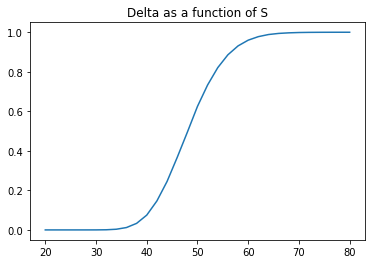

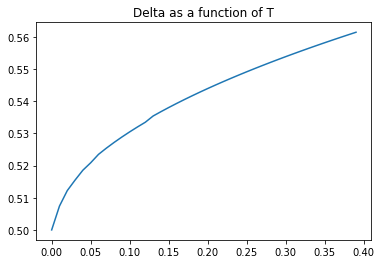

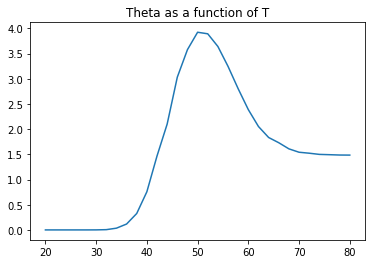

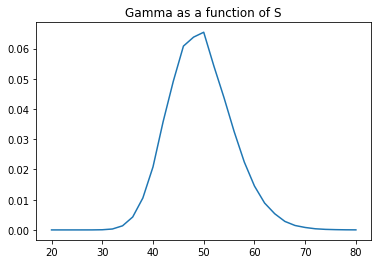

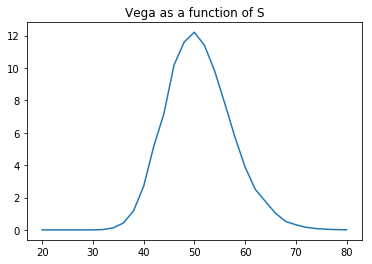

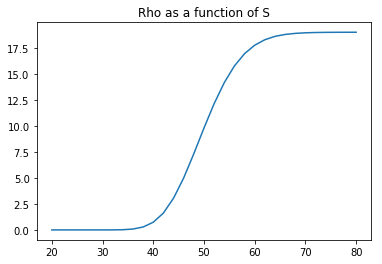

In [3]:
##### 3. 
S0 = 49; K = 50; r = 0.03; sd = 0.2; T = 0.3846; mu = 0.14
S = range(20, 82, 2)
TT = np.arange(0, T+0.01, 0.01)

# (i) Delta of the call
dS = 2
delta = [ (binom_case4("C", s+dS, K, sd, r, T, 200) - binom_case4("C", s, K, sd, r, T, 200))/dS for s in S ]
plt.plot(S, delta)
plt.title('Delta as a function of S')
plt.show()

# (ii) Delta of the call with respect to T
delta_2 = [ (binom_case4("C", S0+dS, K, sd, r, t, 200) - binom_case4("C", S0, K, sd, r, t, 200))/dS for t in TT ]
plt.plot(TT, delta_2)
plt.title('Delta as a function of T')
plt.show()

# (iii) Theta 
dT = 0.005
theta = [ (binom_case4("C", s, K, sd, r, T+dT, 200) - binom_case4("C", s, K, sd, r, T, 200))/dT for s in S ]
plt.plot(S, theta)
plt.title('Theta as a function of T')
plt.show()

# (iv) Gamma 
gamma = [ (binom_case4("C", s+dS, K, sd, r, T, 200) - 2*binom_case4("C", s, K, sd, r, T, 200) + binom_case4("C", s-dS, K, sd, r, T, 200))/(dS*dS) for s in S ]
plt.plot(S, gamma)
plt.title('Gamma as a function of S')
plt.show()

# (v) Vega 
dSD = 0.005
vega = [ (binom_case4("C", s, K, sd+dSD, r, T, 200) - binom_case4("C", s, K, sd, r, T, 200))/dSD for s in S ]
plt.plot(S, vega)
plt.title('Vega as a function of S')
plt.show()

# (vi) Rho 
dRHO = 0.005
rho = [ (binom_case4("C", s, K, sd, r+dRHO, T, 200) - binom_case4("C", s, K, sd, r, T, 200))/dRHO for s in S ]
plt.plot(S, rho)
plt.title('Rho as a function of S')
plt.show()



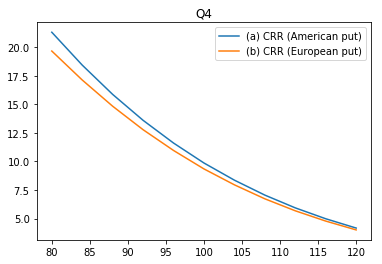

American option shows higher price compared to the european option as it has more chances to exercise, which gives the investor chances to maximize the return.


In [4]:
##### 4. 12-month put option
T = 1; r = 0.05; sd = 0.3; K = 100; S0 = range(80, 124, 4); N = 500
# American options (CRR model)
def binom_a(type, S0, K, sd, rf, T, n): #, dt, u, d, p
    dt = T/n
    u = exp(sd*sqrt(dt))
    d = exp(-1*sd*sqrt(dt))
    p = 0.5 + 0.5*((r - sd*sd/2)*sqrt(dt)/sd)
    discount = exp((-1)*r*dt)

    # stock paths
    stocks = np.zeros((n+1,n+1))
    stocks[0,0] = S0
    for i in range(1, n+1, 1): # row
        stocks[0, i] = stocks[0, 0]*(u**i)
        for j in range(1, i+1, 1): # column
            stocks[j, i] = stocks[j-1,i-1]*d #(d**j)

    option = np.zeros((n+1,n+1))
    if(type == "C"): # call paths
        # final nodes (exercise value)
        for i in range(n, -1, -1): # row
            option[i, n] = max(stocks[i, n] - K, 0)

        for i in range(n-1, -1, -1): # row
            for j in range(n-1, i-1, -1): # column
                # exercise value
                ev = max(stocks[i, j] - K, 0)
                # continuation value
                cv = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])
                option[i,j] = max(ev, cv)
    
    elif(type == "P"):
        #final nodes (exercise value)
        for i in range(n, -1, -1):
            option[i, n] = max(K - stocks[i, n], 0)
        
        for i in range(n-1, -1, -1):
            for j in range(n-1, i-1, -1):
                ev = max(K - stocks[i, j], 0)
                cv = discount*(p*option[i, j+1] + (1-p)*option[i+1, j+1])
                option[i, j] = max(ev, cv)

    return option[0, 0]

crr_a = list()
for s in S0:
    crr_a.append(binom_a("P", s, K, sd, r, T, N))

# European put (CRR model)
crr_e = list()
for s in S0:
    crr_e.append(binom_case4("P", s, K, sd, r, T, N))

plt.plot(S0, crr_a)
plt.plot(S0, crr_e)
plt.title('Q4')
plt.gca().legend(['(a) CRR (American put)', '(b) CRR (European put)'])
plt.show()
print('American option shows higher price compared to the european option as it has more chances to exercise, which gives the investor chances to maximize the return.')



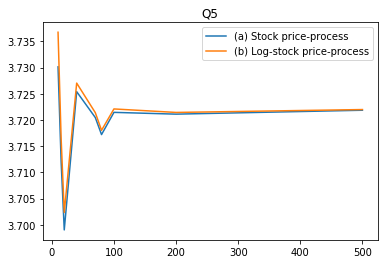

In [5]:
##### 5. Trinomial method
def trinomial(S0, K, sd, r, T, n):
    dt = T/n
    d = exp((-1)*sd*sqrt(3*dt))
    u = 1/d
    pd = (r*dt*(1-u) + (r*dt)**2 + sd*sd*dt)/((u-d)*(1-d))
    pu = (r*dt*(1-d) + (r*dt)**2 + sd*sd*dt)/((u-d)*(u-1))
    pm = 1-pu-pd
    discount = exp(-1*r*dt)

    stocks = np.zeros((2*n+1,n+1))
    for i in range(0, n+1, 1):
        stocks[n-i, i] = S0*(u**i)
        for j in range(1, i*2+1, 1):
            stocks[n-i+j, i] = stocks[n-i, i]*(d**j)

    option = np.zeros((2*n+1,n+1))
    # final nodes
    for i in range(2*n, -1, -1): # row
        option[i, n] = max(stocks[i, n] - K, 0)
    
    a = 0
    for j in range(n-1, -1, -1): # column: 9 ~ 1
        a += 1
        for i in range(2*n-1*a, n-j-1, -1): # row
            option[i, j] = discount*(pu*option[i-1,j+1] + pm*option[i, j+1] + pd*option[i+1, j+1])

    return option[n, 0]

T = 0.5; r = 0.05; sd = 0.24; S0 = 32; K = 30
N = [10, 15, 20, 40, 70, 80, 100, 200, 500]
trinom_call = list()

for n in N:
    trinom_call.append(trinomial(S0, K, sd, r, T, n))

# (b) log-stock price process
def trinomial2(X0, K, sd, r, T, n):
    dt = T/n
    xu = sd*sqrt(3*dt)
    xd = (-1)*sd*sqrt(3*dt)
    pd = 1/2*( (sd*sd*dt + ((r-sd*sd/2)*dt)**2)/(xu*xu) - (r-sd*sd/2)*dt/xu )
    pu = 1/2*( (sd*sd*dt + ((r-sd*sd/2)*dt)**2)/(xu*xu) + (r-sd*sd/2)*dt/xu )
    pm = 1-pu-pd
    discount = exp(-1*r*dt) # not sure

    logst = np.zeros((2*n+1,n+1))
    logst[n,0] = X0
    #print(stocks)
    for i in range(1, n+1, 1):
        logst[n-i, i] = X0 + xu*i
        for j in range(1, i*2+1, 1):
            logst[n-i+j, i] = logst[n-i, i] + xd*j

    option = np.zeros((2*n+1,n+1))
    # final nodes
    for i in range(2*n, -1, -1): # row
        option[i, n] = max(exp(logst[i, n]) - K, 0)
    
    a = 0
    for j in range(n-1, -1, -1): # column: 9 ~ 1
        a += 1
        for i in range(2*n-1*a, n-j-1, -1): # row
            option[i, j] = discount*(pu*option[i-1,j+1] + pm*option[i, j+1] + pd*option[i+1, j+1])

    return option[n, 0]

X0 = log(S0)
trinom_logcall = list()
for n in N:
    trinom_logcall.append(trinomial2(X0, K, sd, r, T, n))

plt.plot(N, trinom_call)
plt.plot(N, trinom_logcall)
plt.title('Q5')
plt.gca().legend(['(a) Stock price-process', '(b) Log-stock price-process'])
plt.show()



In [6]:
##### 6. 
def Halton(k, m):
    # k: k-th number in the sequance with base m
    # m: base    
    temp = list()
    while k:
        k, a = divmod(k, m)
        temp.append(a)
    h = np.sum([a / m**i for a, i in zip(temp, range(1, len(temp)+1, 1))])
    return h

def box_muller(n, b1, b2):
    h1 = [Halton(i, b1) for i in range(1, n+1, 1)]
    h2 = [Halton(i, b2) for i in range(1, n+1, 1)]
    box_z1 = [ sqrt(-2*log(x)) * cos(2*pi*y) for x, y in zip(h1, h2) ]
    box_z2 = [ sqrt(-2*log(x)) * sin(2*pi*y) for x, y in zip(h1, h2) ]
    return box_z2

# Monte Carlo
def calloption(S0, K, T, r, sd, n):
    sqrtdt = sqrt(T)
    discount = exp(-1*r*T)
    z1 = box_muller(n, 2, 7) # base 2 and 7
    W = [ sqrtdt*x for x in z1 ]
    ST = [ S0*exp( sd*w + (r-sd*sd/2)*T ) for w in W ]
    C = discount*np.mean([ max(0, s - K) for s in ST ])
    #C0 = np.mean(C)
    return C

S0 = float(input("Current price:"))
K = float(input("Strike price:"))
T = float(input("Time to expiration:"))
r = float(input("Risk-free rate:"))
sd = float(input("Volatility:"))
N = int(input("Number of points:"))
c = calloption(S0, K, T, r, sd, N) #S0, K, T, r, sd, N
print('C(S0=',S0,', K=', K, ', T=', T, ', r=', r, ', sd=', sd, ', N=', N, ') =', c)



Current price:32
Strike price:30
Time to expiration:0.5
Risk-free rate:0.05
Volatility:0.24
Number of points:500
C(S0= 32.0 , K= 30.0 , T= 0.5 , r= 0.05 , sd= 0.24 , N= 500 ) = 3.747579658491441
